# SALES PREDICTION USING PYTHON

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*OB6ODKHJN_IfS2IC3rIlQg.png)

## **Problem Statement**

**Project Overview**:

Sales prediction involves forecasting how much of a product people will buy based on various factors like advertising expenditure, target audience demographics, and the advertising platform. This is a crucial task for businesses as it helps them optimize their marketing strategies and budget allocations. This project is designed to help you learn how to build a model for sales prediction using Python.

**Key Objectives**:

* Explore the factors affecting product sales.
* Create a machine learning model to predict future sales.
* Gain valuable experience in the field of machine learning and sales forecasting.

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as plio
from xgboost import XGBRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from warnings import filterwarnings
filterwarnings(action='ignore')

#### Loading the dataset

In [2]:
df = pd.read_csv("Advertising.csv")

#### Reading the data

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
df.shape

(200, 5)

In [6]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df=df.drop(columns=["Unnamed: 0"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


## *Data preprocessing:*

#### Check for Null Values

In [12]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

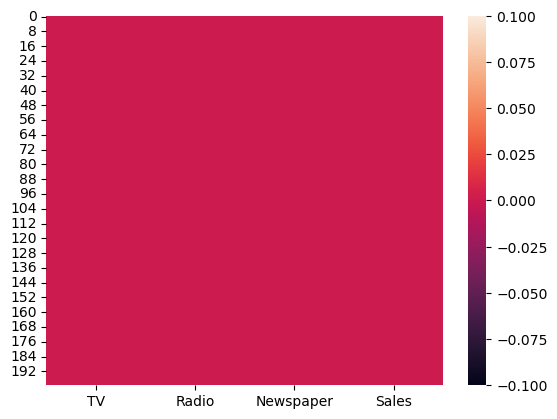

In [13]:
import seaborn as sns
sns.heatmap(df.isnull())

#### Conclusion
The consistent heatmap indicates that the dataset is full, with no missing values. This means that data preparation may proceed without the need for imputation of missing data.
.


In [14]:
duplicate_count = df.duplicated().sum()
print(duplicate_count)

0


## **Data Visualization**

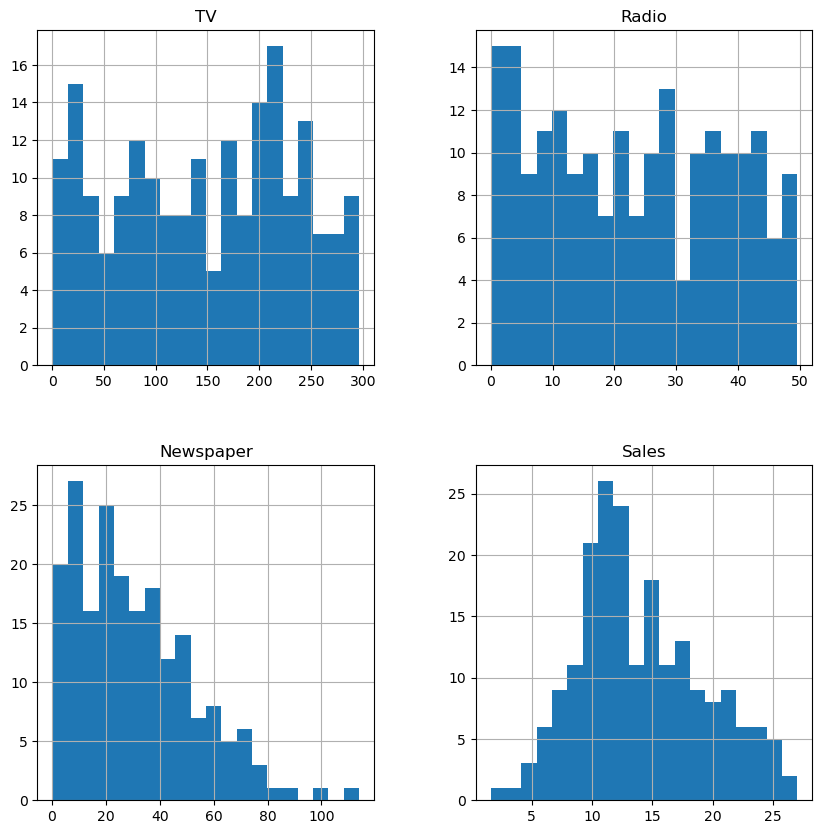

In [15]:
#plot histogram
df.hist(bins=20,figsize=(10,10))
#plot showing
plt.show()


**Conclusion:**
1. **TV Advertising:** The spending on TV advertisements is spread across a wide range, with notable peaks around 50, 150, and 250 units.
2. **Radio Advertising:** Radio advertising spend shows a more even distribution, with a higher frequency of lower spend values around 10 units.
3. **Newspaper Advertising:** The spending on newspaper advertisements is skewed towards lower values, with most of the spend concentrated below 40 units.
4. **Sales:** Sales distribution is approximately normal, with a peak around 15 units, indicating that the majority of sales fall within this range.

This analysis suggests varying degrees of investment across different advertising mediums and a relatively normal distribution of sales, which will be useful for predictive modeli

<Axes: xlabel='Sales', ylabel='TV'>

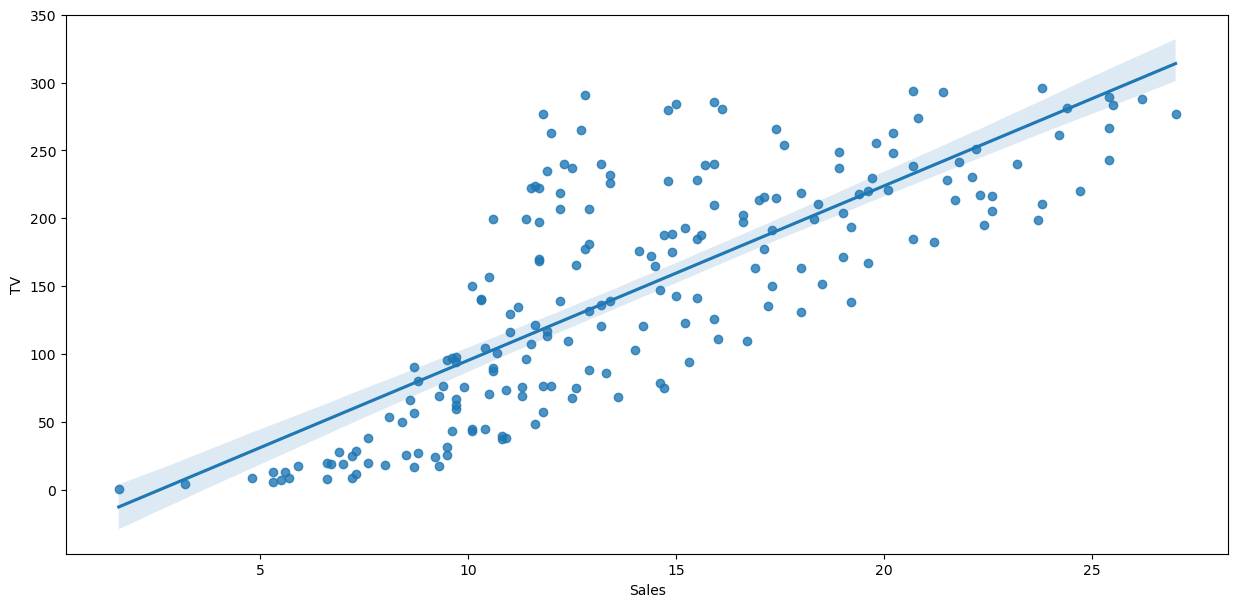

In [16]:
#to check linear relationship between columns
plt.figure(figsize=(15,7))

sns.regplot(data =df, x = 'Sales', y = 'TV', scatter = True)

<Axes: xlabel='Sales', ylabel='Radio'>

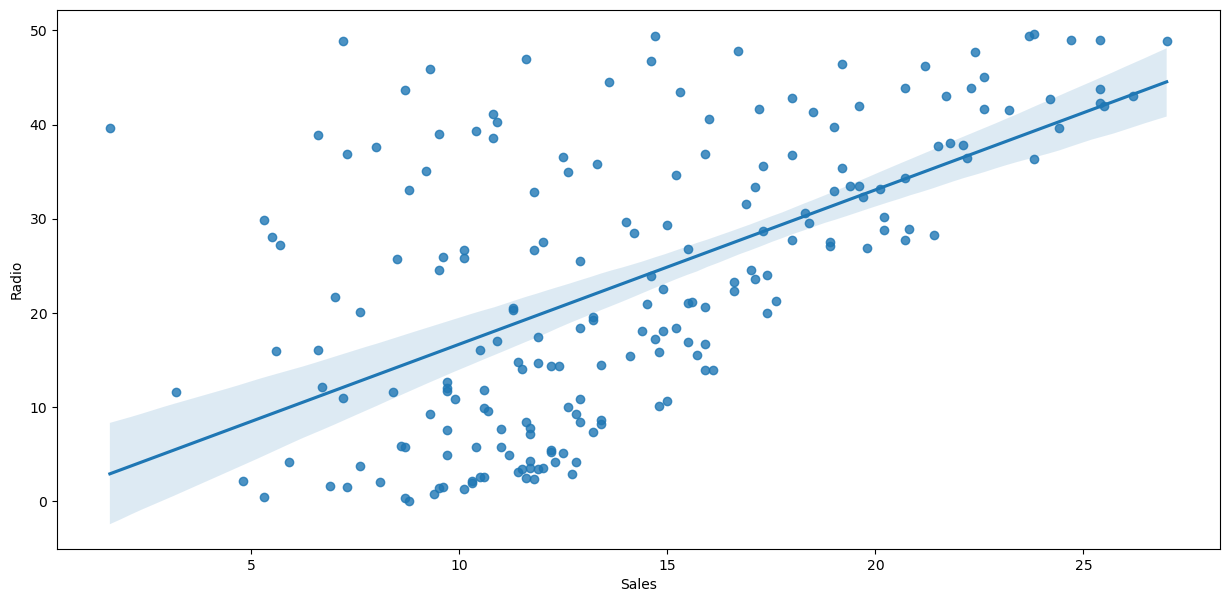

In [17]:
plt.figure(figsize=(15,7))

sns.regplot(data =df, x = 'Sales', y = 'Radio', scatter = True)

<Axes: xlabel='Sales', ylabel='Newspaper'>

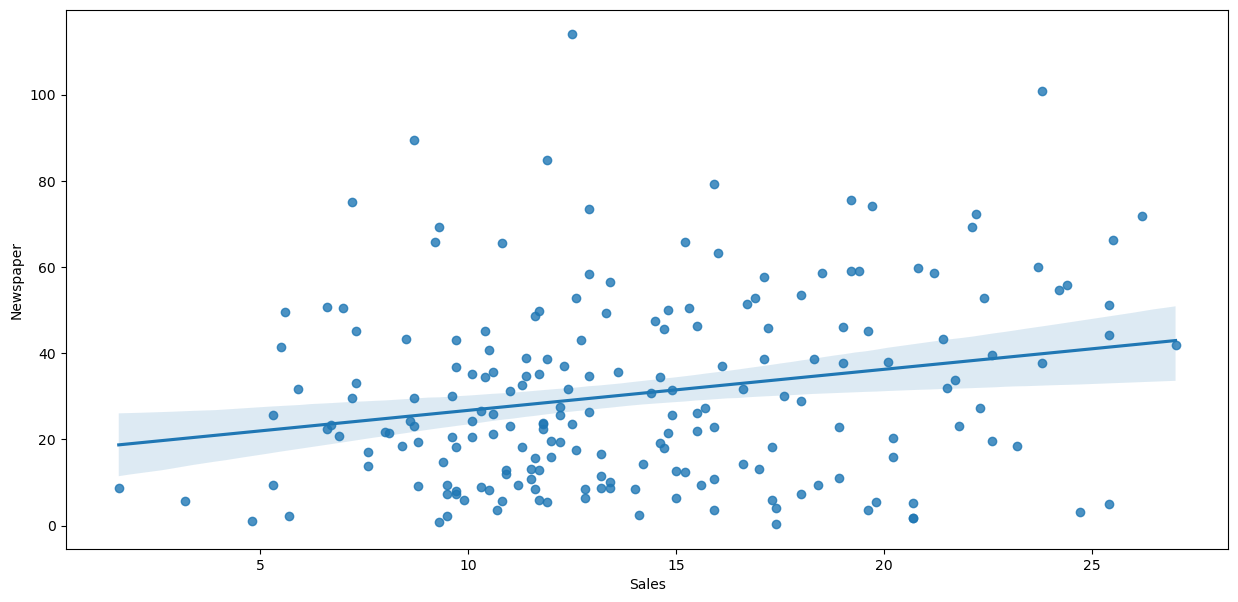

In [18]:

plt.figure(figsize=(15,7))

sns.regplot(data =df, x = 'Sales', y = 'Newspaper', scatter = True)

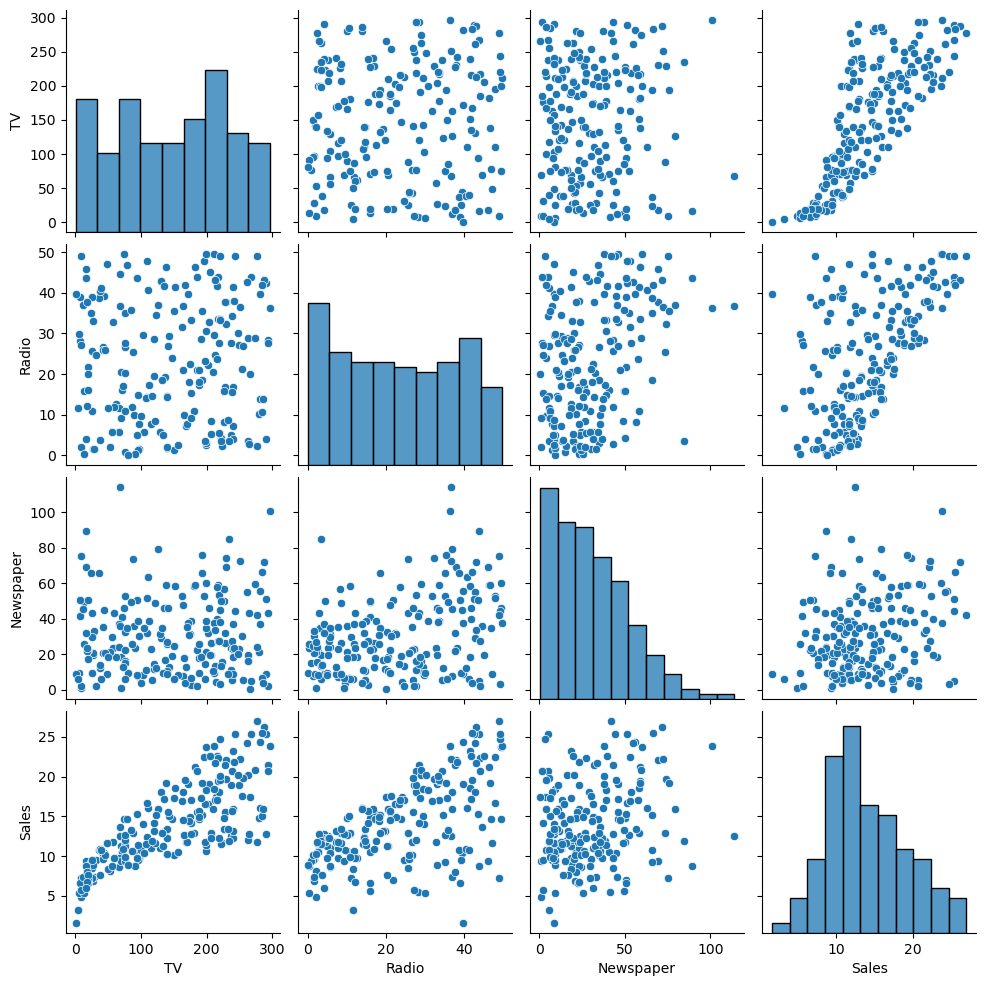

In [19]:
sns.pairplot(df)

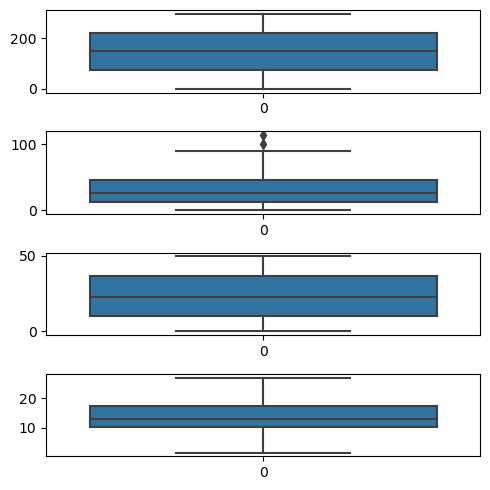

In [20]:
# Outlier Analysis
fig, axs = plt.subplots(4, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt4 = sns.boxplot(df['Sales'],ax=axs[3])
plt.tight_layout()

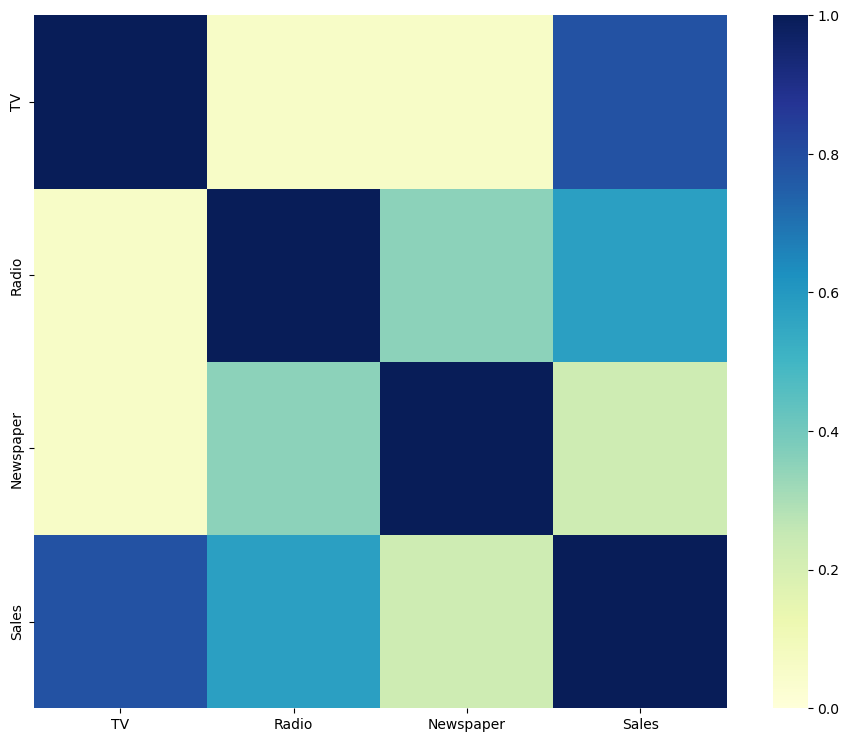

In [21]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=0, vmax=1, square=True, cmap="YlGnBu", ax=ax)
plt.show()

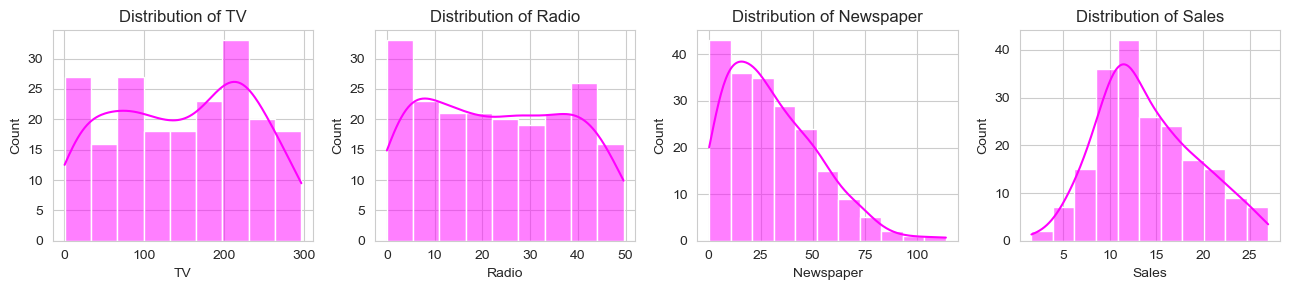

In [22]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')
# Histograms for distributions
plt.figure(figsize=(13, 3))
for i, column in enumerate(['TV', 'Radio', 'Newspaper', 'Sales'], start=1):
    plt.subplot(1, 4, i)
    sns.histplot(df[column], kde=True, color = 'magenta')
    plt.title('Distribution of ' + column)
plt.tight_layout()

### Skewness

In [23]:
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.894720
Sales        0.407571
dtype: float64

In [24]:
df['Newspaper']=np.sqrt(df['Newspaper'])


### Transforming data to remove skewness:

In [25]:
#dividing data in feauture and vector
x=df.drop(['Sales'],axis=1)
y=df['Sales']

In [26]:
from sklearn.preprocessing import power_transform
X=power_transform(x,method='yeo-johnson')

In [27]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [28]:
df.skew()

TV          -0.069853
Radio        0.094175
Newspaper    0.062388
Sales        0.407571
dtype: float64

## Normal Distribution Curve

<Axes: xlabel='Newspaper', ylabel='Density'>

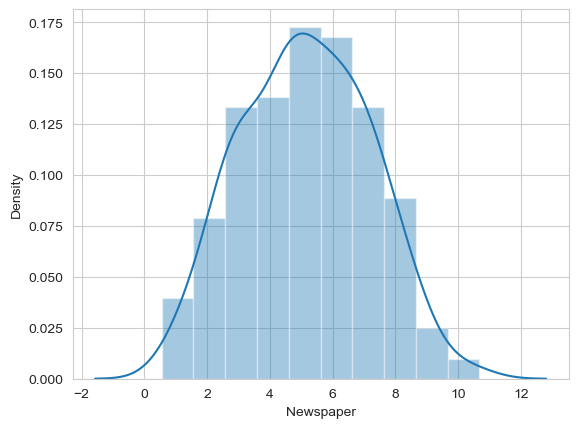

In [29]:
sns.distplot(df['Newspaper'])

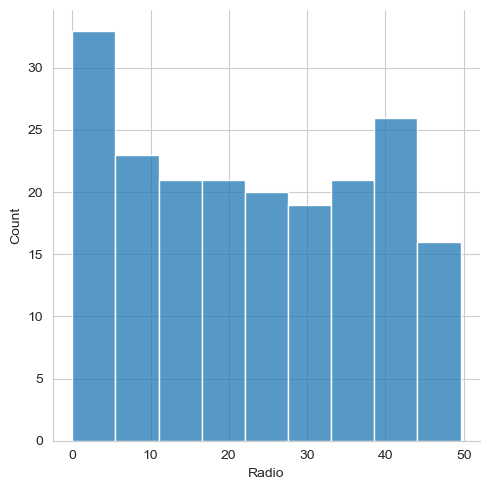

In [30]:
sns.displot(df['Radio'])

<Axes: xlabel='TV', ylabel='Density'>

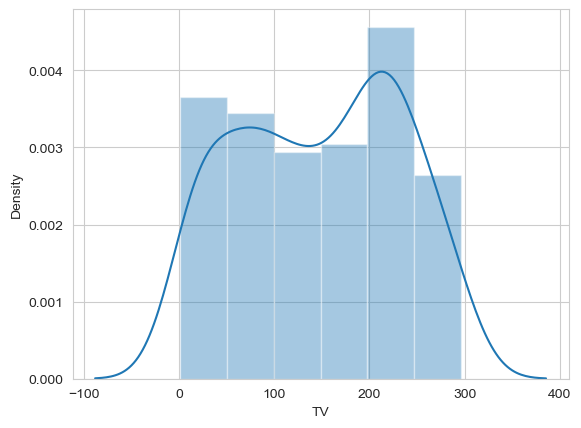

In [31]:
sns.distplot(df['TV'])

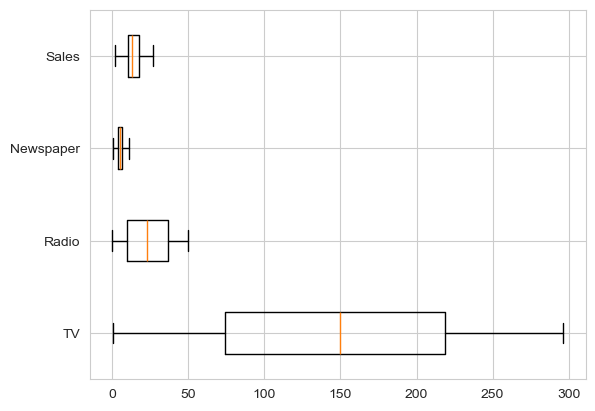

In [32]:
plt.boxplot(df,vert=False,data = df,labels=df.columns)
plt.show()

's'

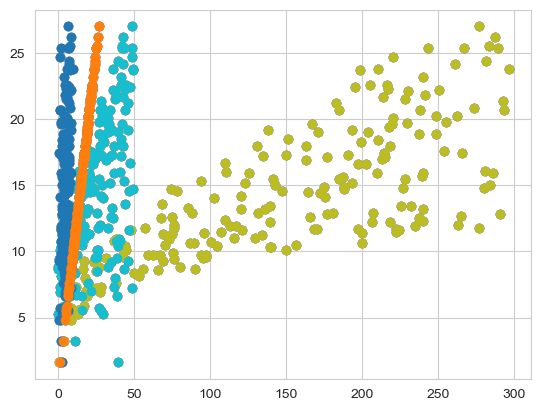

In [33]:
def sc():
    l=df.columns
    for i in range(len(l)-1):
        for j in l:
            s = plt.scatter(j,'Sales',data=df)
    return 's'
sc()

## **Data preparation for modelling**

#### Splitting the Train and Test sets

In [34]:
x = df.iloc[:,:3]
y = df.iloc[:,3:]
x

,TV,Radio,Newspaper
0,230.1,37.8,8.318654
1,44.5,39.3,6.715653
2,17.2,45.9,8.324662
3,151.5,41.3,7.648529
4,180.8,10.8,7.641989
...,...,...,...
195,38.2,3.7,3.714835
196,94.2,4.9,2.846050
197,177.0,9.3,2.529822
198,283.6,42.0,8.136338


In [35]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## **Training Models using the above data**

#### [A] Linear Regression Model

In [37]:
model_1 = LinearRegression()
model_1.fit(x_train, y_train)
y_pred_1 = model_1.predict(x_test)

In [38]:
mse = mean_squared_error(y_test, y_pred_1)
r2 = r2_score(y_test, y_pred_1)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 3.7142876486951693
R-Squared score is : 0.8852840315073638


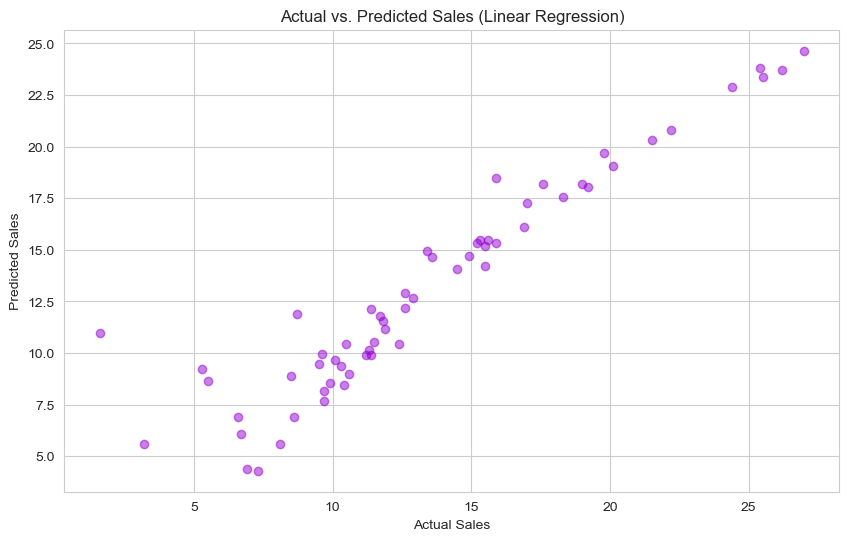

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_1, alpha=0.5, color='darkviolet')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Linear Regression)')
plt.show()

### [B] Random Forest Regression Model

In [40]:
model_2 = RandomForestRegressor() 
model_2.fit(x_train, y_train) 
y_pred_2 = model_2.predict(x_test)

In [41]:
mse = mean_squared_error(y_test, y_pred_2)
r2 = r2_score(y_test, y_pred_2)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 1.093114700000001
R-Squared score is : 0.9662390952601396


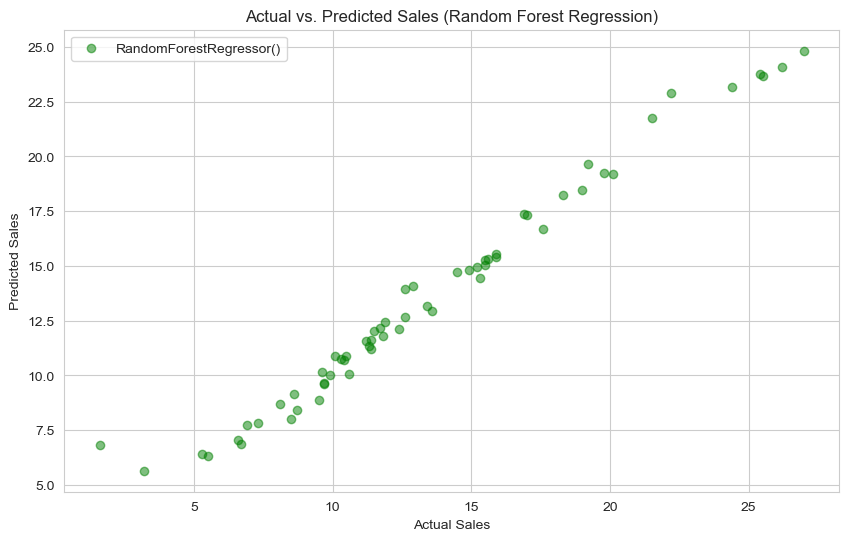

In [42]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_2, label=model_2, alpha=0.5, color='green')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Random Forest Regression)')

plt.legend()
plt.show()

#### [C] Ridge Regression Model

In [43]:
model_3 = Ridge() 
model_3.fit(x_train, y_train) 
y_pred_3 = model_3.predict(x_test)

In [44]:
mse = mean_squared_error(y_test, y_pred_3)
r2 = r2_score(y_test, y_pred_3)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 3.7137163811702307
R-Squared score is : 0.8853016751347804


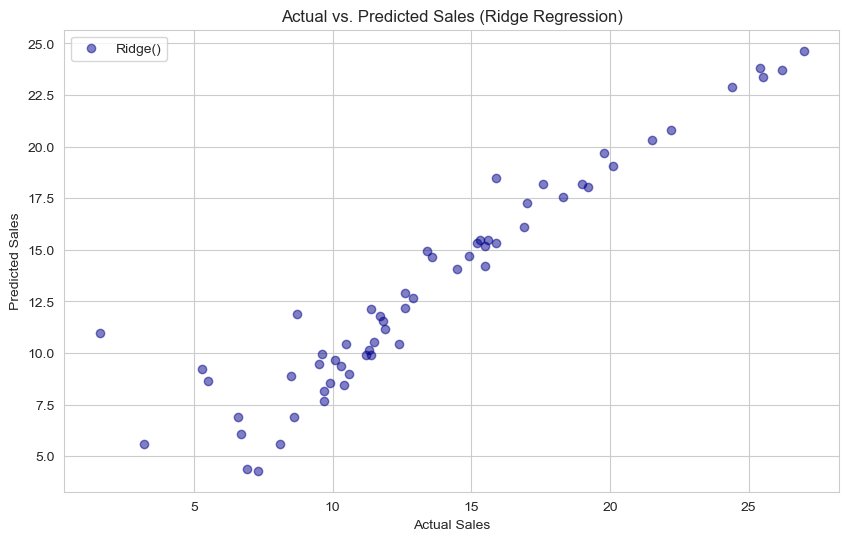

In [45]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_3, label=model_3, alpha=0.5, color='darkblue')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Ridge Regression)')
plt.legend()
plt.show()

#### [D] Lasso Regression Model

In [46]:
model_4 = Lasso() 
model_4.fit(x_train, y_train) 
y_pred_4 = model_4.predict(x_test)

In [47]:
mse = mean_squared_error(y_test, y_pred_4)
r2 = r2_score(y_test, y_pred_4)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 3.439003441080596
R-Squared score is : 0.8937861986721303


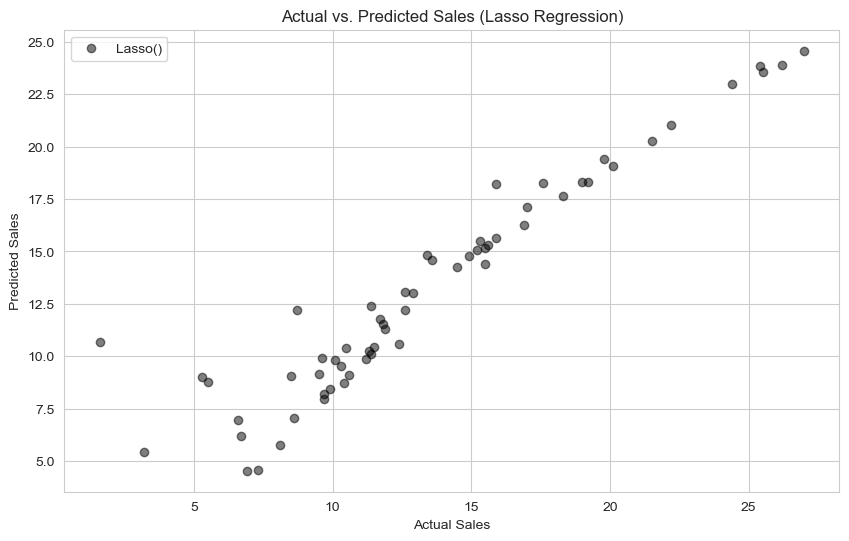

In [48]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_4, label=model_4, alpha=0.5, color='black')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Lasso Regression)')

plt.legend()
plt.show()

#### [E] Gradient Boosting Regression Model

In [49]:
model_6 = GradientBoostingRegressor() 
model_6.fit(x_train, y_train) 
y_pred_6 = model_6.predict(x_test)

In [50]:
mse = mean_squared_error(y_test, y_pred_6)
r2 = r2_score(y_test, y_pred_6)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 0.9684659832570922
R-Squared score is : 0.9700888774027667


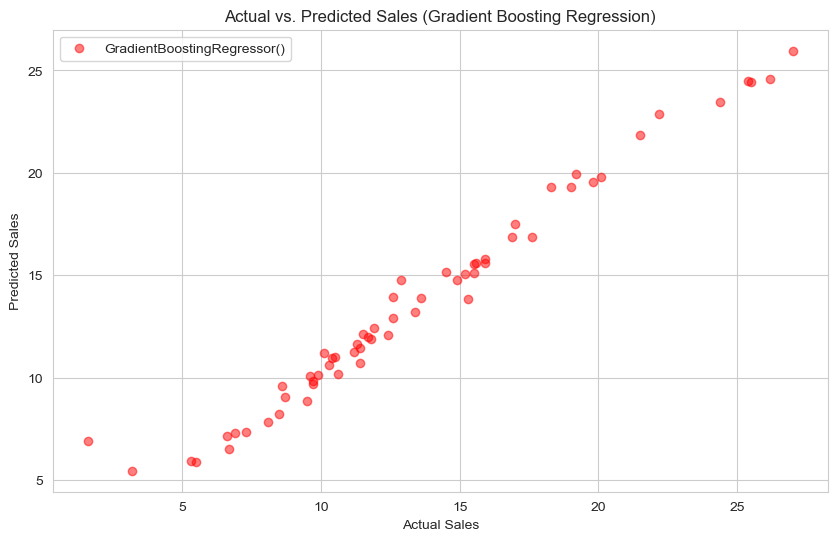

In [51]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_6, label=model_6, alpha=0.5, color='red')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Gradient Boosting Regression)')
plt.legend()
plt.show()

####  [F] XGBoost Regression Model

In [52]:
model_7 = XGBRegressor()
model_7.fit(x_train, y_train) 
y_pred_7 = model_7.predict(x_test)

In [53]:
mse = mean_squared_error(y_test, y_pred_7)
r2 = r2_score(y_test, y_pred_7)
print("Mean Square Error is :", mse)
print("R-Squared score is :",r2)

Mean Square Error is : 1.1219527333921178
R-Squared score is : 0.9653484310889999


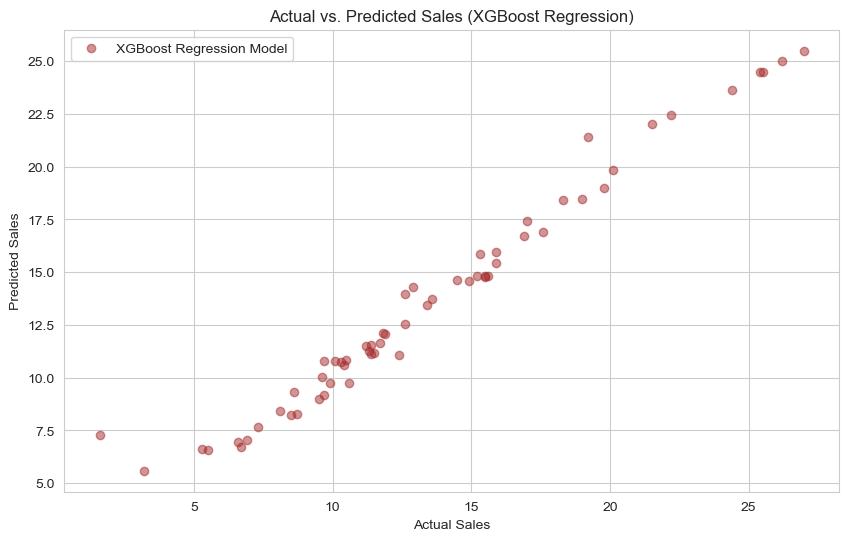

In [54]:
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_7, label='XGBoost Regression Model', alpha=0.5, color='brown')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (XGBoost Regression)')
plt.legend()
plt.show()

### Model r^2 scores of each regression model

In [55]:
model_r2_scores = {
     "Linear Regression Model":  r2_score(y_test, y_pred_1),

     "Random Forest Regression Model":  r2_score(y_test, y_pred_2),

     "Ridge Regression Model":  r2_score(y_test, y_pred_3),

     "Lasso Regression Model":  r2_score(y_test, y_pred_4),

     "Gradient Boosting Regression Model": r2_score(y_test, y_pred_6),

     "XGBoost Regression Model":  r2_score(y_test, y_pred_7)
}

In [56]:
model_r2_scores

{'Linear Regression Model': 0.8852840315073638,
 'Random Forest Regression Model': 0.9662390952601396,
 'Ridge Regression Model': 0.8853016751347804,
 'Lasso Regression Model': 0.8937861986721303,
 'Gradient Boosting Regression Model': 0.9700888774027667,
 'XGBoost Regression Model': 0.9653484310889999}

In [57]:
best_model_name = max(model_r2_scores, key=model_r2_scores.get)
best_r2_score = model_r2_scores[best_model_name]

print(f"Best Performing Model is {best_model_name} with an R^2 score of {best_r2_score}")

Best Performing Model is Gradient Boosting Regression Model with an R^2 score of 0.9700888774027667


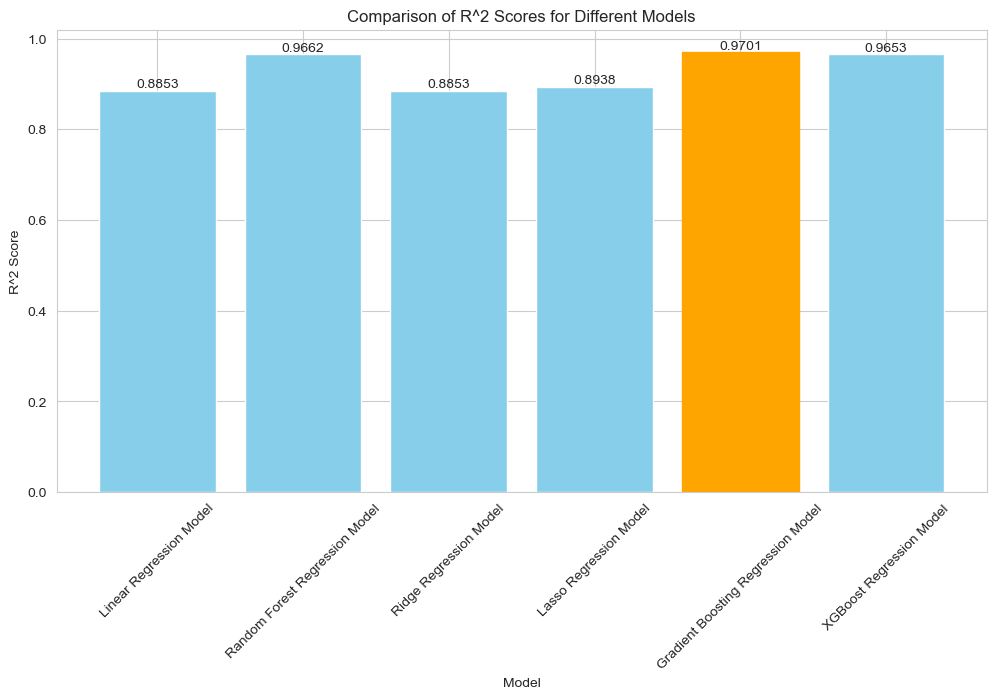

In [58]:
plt.figure(figsize=(12, 6))

bars = plt.bar(model_r2_scores.keys(), model_r2_scores.values(), color='skyblue')

# Highlight the best performing model
for bar, model_name in zip(bars, model_r2_scores.keys()):
    if model_name == best_model_name:
        bar.set_color('orange')

# Annotate the R-squared scores on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), ha='center', va='bottom')

plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.title('Comparison of R^2 Scores for Different Models')

# Rotate the x labels for better readability
plt.xticks(rotation=45)
plt.show()

## **Model having the best fit**

In [59]:
final_model = model_6
joblib.dump(final_model, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']

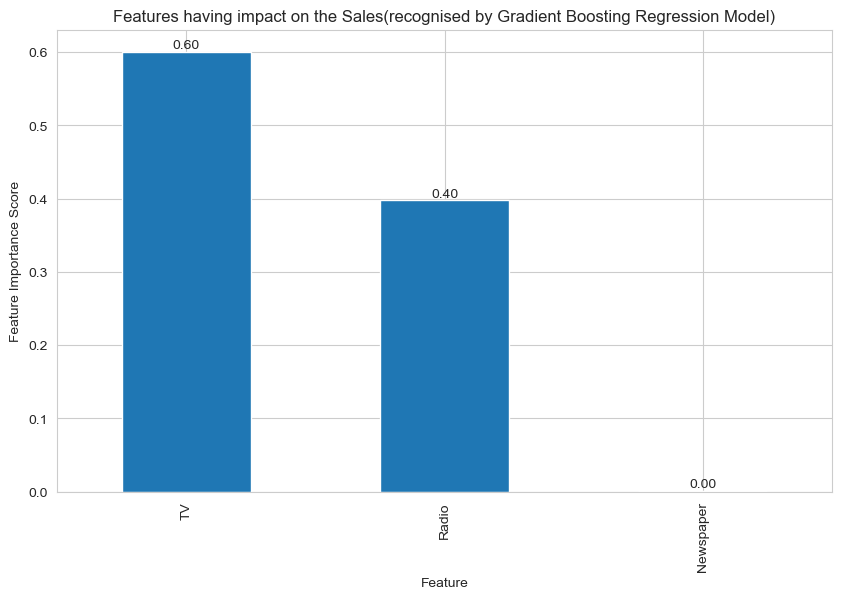

In [60]:
feature_importances = pd.Series(final_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10, 6))
features = feature_importances
features.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Feature Importance Score')
plt.title('Features having impact on the Sales(recognised by Gradient Boosting Regression Model)')
for index, value in enumerate(features):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()
